### Sales Prediction

#### Problem Statement
Build a model which predicts sales based on the money spent on different platforms for marketing.

#### Data
Use the advertising dataset given in ISLR and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.

In this notebook, we'll build a linear regression model to predict Sales using an appropriate predictor variable.

In [69]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [70]:
df=pd.read_csv('advertising.csv')

In [71]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


## EDA(Exploratray Data Analysis)

In [72]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Observation- 
1. There are no null values in given dataset
2. All the attributes are numbericals
3. There are 4 attributes with 200 rows

In [74]:
df = df.drop_duplicates()

In [75]:
df.shape

(200, 4)

Observation- There are no duplicates values in given dataset

In [76]:
pd.DataFrame( df.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
TV,0
Radio,0
Newspaper,0
Sales,0


 Parameter Analysis

##### Numberical Values - TV , Radio, Newspaper, Sales

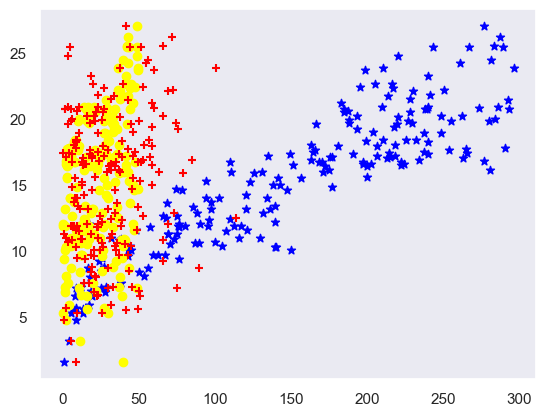

In [77]:
plt.scatter(df['TV'],df['Sales'],marker='*',c='blue')
plt.scatter(df['Radio'],df['Sales'],c='yellow')
plt.scatter(df['Newspaper'],df['Sales'],marker='+',c='red')

# Outlier Detection 

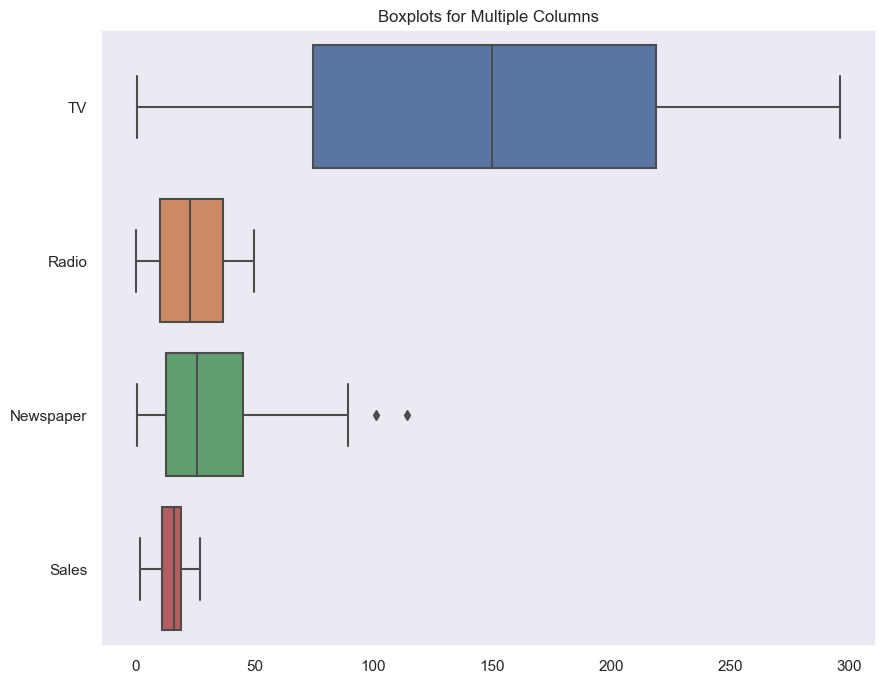

In [78]:
# Create boxplots for all columns
sns.set(style="dark")
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, orient="h")
plt.title("Boxplots for Multiple Columns")
plt.show()

Observation- Only newspaper has outlier

In [79]:
# Calculate the IQR (Interquartile Range)
Q1 = df['Newspaper'].quantile(0.25)
Q3 = df['Newspaper'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Use boolean indexing to remove outliers
outliers = df[(df['Newspaper'] < lower_bound) | (df['Newspaper'] > upper_bound)]

df = df[(df['Newspaper'] >= lower_bound) & (df['Newspaper'] <= upper_bound)]


In [80]:
outliers

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [81]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<AxesSubplot:xlabel='Newspaper'>

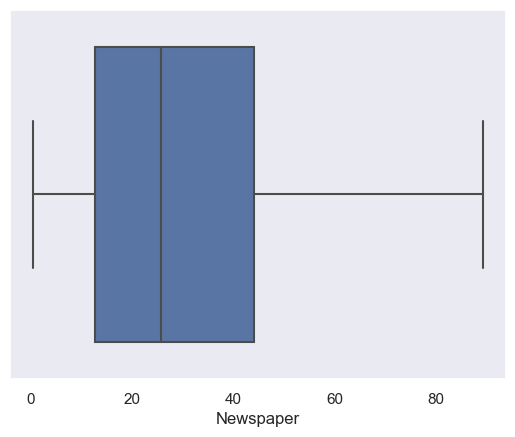

In [82]:
sns.boxplot(df['Newspaper'])

Observation- we successfully remove all outlier

# Data Visulization

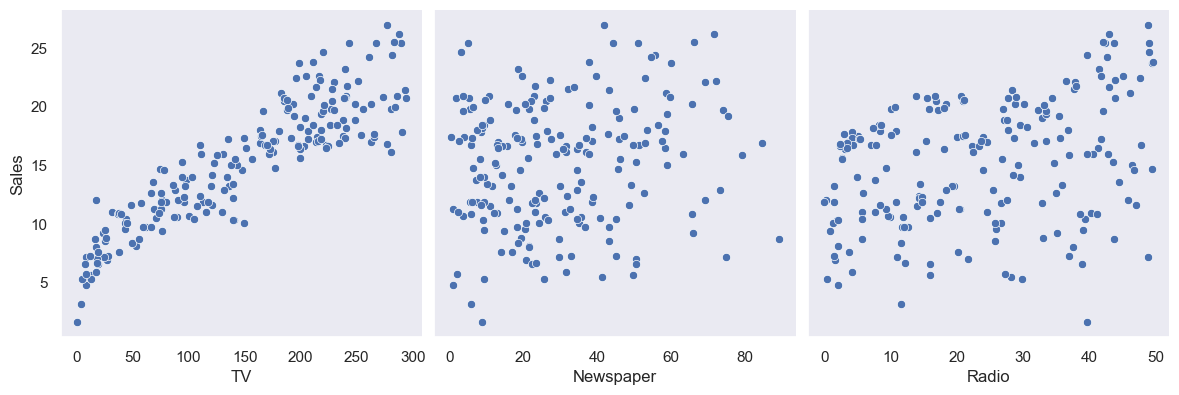

In [84]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

Observation- Only T.V parameter is highly corelated to sales data

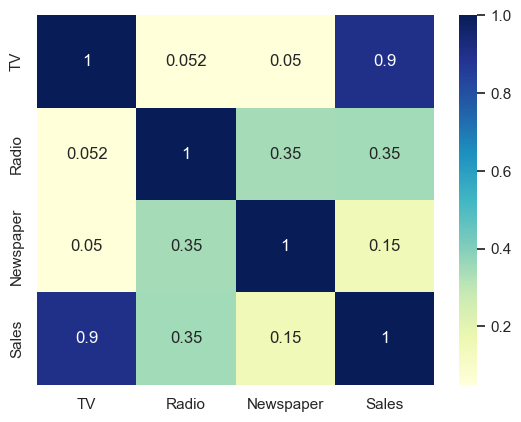

In [87]:
# Let's see the correlation between different variables.
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

 Observation- Only T.V parameter has high co-relation to sales data

# Model Training

In [96]:
X = df[['TV']]
y = df['Sales']

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate R-squared (Coefficient of Determination)
r_squared = r2_score(y_test, y_pred)

print(f"R-squared (Coefficient of Determination): {r_squared:.2f}")


R-squared (Coefficient of Determination): 0.82


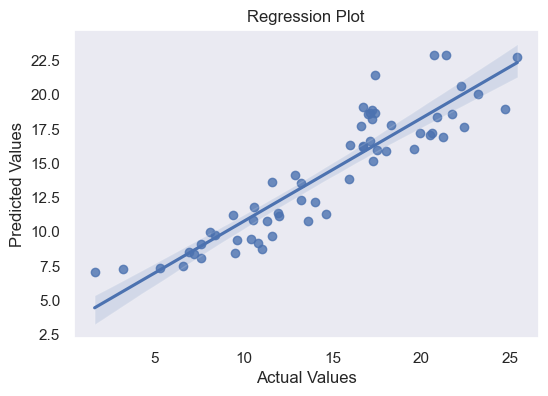

In [103]:
# Create a scatter plot with the regression line
plt.figure(figsize=(6, 4))
sns.regplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Plot")
plt.show()

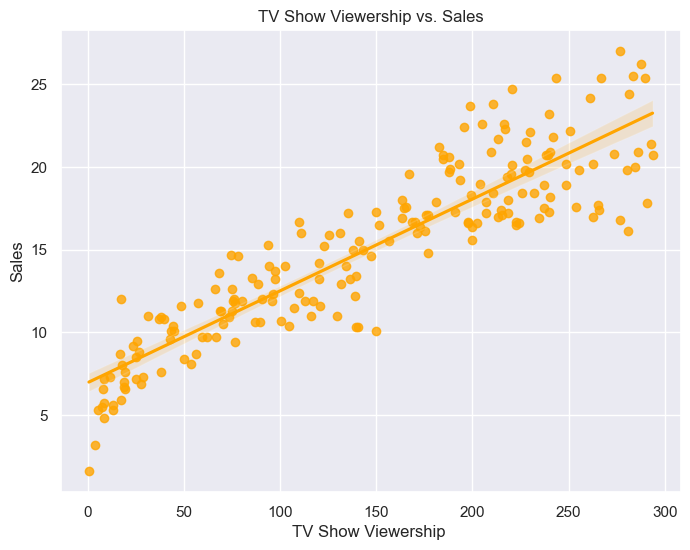

In [119]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.regplot(df['TV'], df['Sales'], color='orange', marker='o')
plt.title('TV Show Viewership vs. Sales')
plt.xlabel('TV Show Viewership ')
plt.ylabel('Sales')
plt.grid(True)

# Show the plot
plt.show()

 Conclusion- As TV advertisement increases then sales advertisement increases